**Import the revelant Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler

**Load the Data**

In [46]:
# Load the data
raw_data = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")
print(raw_data)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [47]:
raw_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [48]:
#check the data
raw_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [49]:
print(raw_data.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

In [50]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## **Exploratory Data Analysis**

In [51]:
#Filter columns with dtype as float
float_col=[col for col, dtype in raw_data.dtypes.items() if dtype=="float"]
#print categorical variables
print("categorical variables")
print(float_col)

categorical variables
['oldpeak']


In [52]:
#Resting bps
a=raw_data.loc[raw_data["resting bp s"]==0]["resting bp s"].count()
min_no_c=raw_data.loc[raw_data["resting bp s"]!=0]["resting bp s"].min()
print(f"Number of instances where resting bp s is 0: \t{a}\n the minimum resting bp s not counting 0:\t{min_no_c}\n")


Number of instances where resting bp s is 0: 	1
 the minimum resting bp s not counting 0:	80



In [53]:
#cholesterol
b=raw_data.loc[raw_data["cholesterol"]==0]["cholesterol"].count()
min_no_c=raw_data.loc[raw_data["cholesterol"]!=0]["cholesterol"].min()
print(f"Number of instances where cholesterol is 0: \t{b}\n the minimum cholesterol not counting 0:\t{min_no_c}\n")



Number of instances where cholesterol is 0: 	172
 the minimum cholesterol not counting 0:	85



## **Plotting the Graphs**

**plotting of histogram**

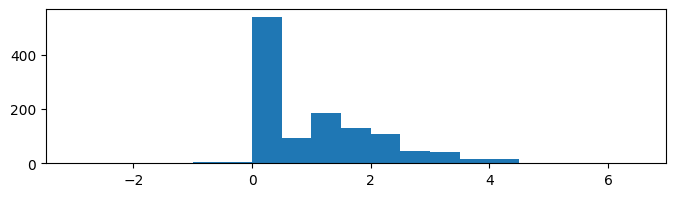

<Figure size 640x480 with 0 Axes>

In [55]:
fig, axs=plt.subplots(1,1,figsize=(8,2))
bins=np.arange(start=-3, stop=7, step=0.5)
plt.hist(raw_data.oldpeak, bins=bins)
plt.show()
plt.savefig('hist1')

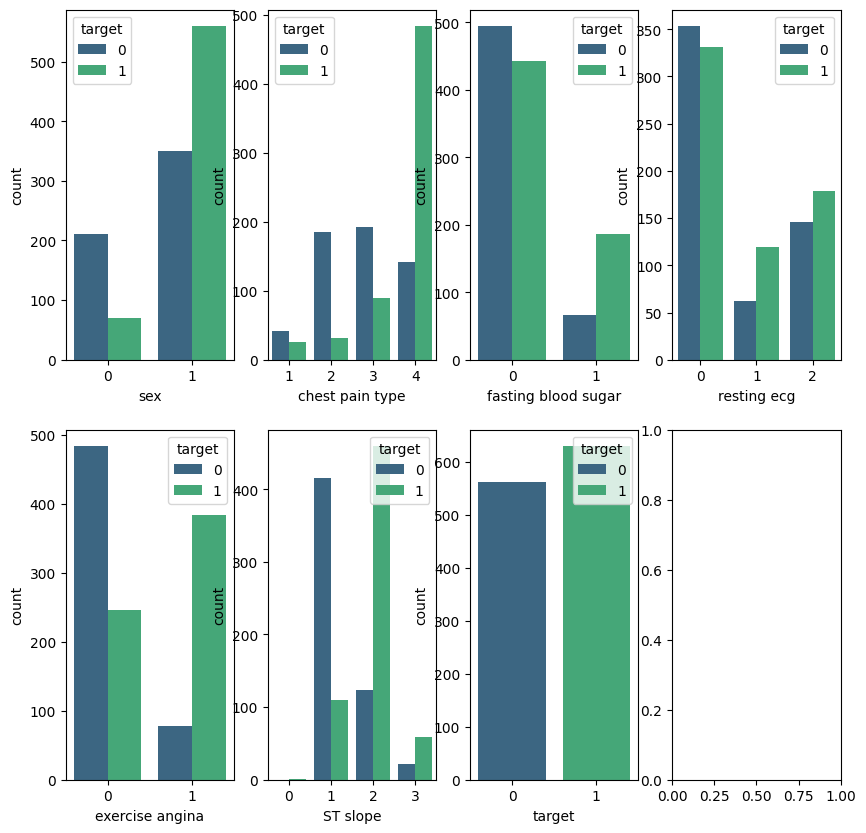

In [56]:
cat=["sex","chest pain type","fasting blood sugar","resting ecg","exercise angina","ST slope","target"]
fig, axs=plt.subplots(2,4, figsize=(10,10))
axs=axs.flatten()
for i,ax in enumerate(axs):
  if i>=len(cat):
    break
  sns.countplot(data=raw_data, x=cat[i], hue='target', ax=ax, palette='viridis')
  plt.savefig("hist2")


num: age
num: resting bp s
num: cholesterol
num: max heart rate
num: oldpeak


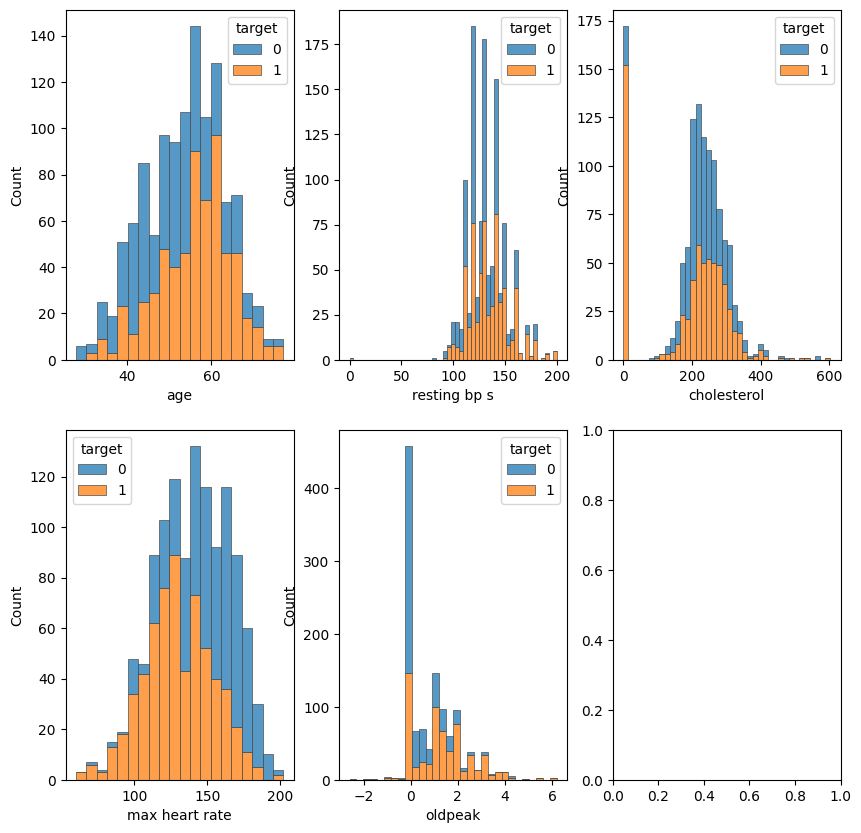

<Figure size 640x480 with 0 Axes>

In [57]:
num = ["age","resting bp s", "cholesterol", "max heart rate", "oldpeak"]
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
for i,ax in enumerate(axs):
       if i >= len(num):
           break
       sns.histplot(raw_data, x=raw_data[num[i]], hue=raw_data["target"], multiple="stack", edgecolor=".3", linewidth=.5, ax=ax)
       print(f"num: {num[i]}")
plt.show()
plt.savefig("hist3")

**plotting of Heatmap**

In [58]:
print(raw_data.corr().head())

                      age       sex  chest pain type  resting bp s  \
age              1.000000  0.015096         0.149055      0.257692   
sex              0.015096  1.000000         0.138405     -0.006443   
chest pain type  0.149055  0.138405         1.000000      0.009466   
resting bp s     0.257692 -0.006443         0.009466      1.000000   
cholesterol     -0.046472 -0.208441        -0.109396      0.099037   

                 cholesterol  fasting blood sugar  resting ecg  \
age                -0.046472             0.178923     0.194595   
sex                -0.208441             0.110961    -0.022225   
chest pain type    -0.109396             0.076492     0.035705   
resting bp s        0.099037             0.088235     0.095860   
cholesterol         1.000000            -0.239778     0.150879   

                 max heart rate  exercise angina   oldpeak  ST slope    target  
age                   -0.368676         0.188095  0.245093  0.237749  0.262029  
sex                 

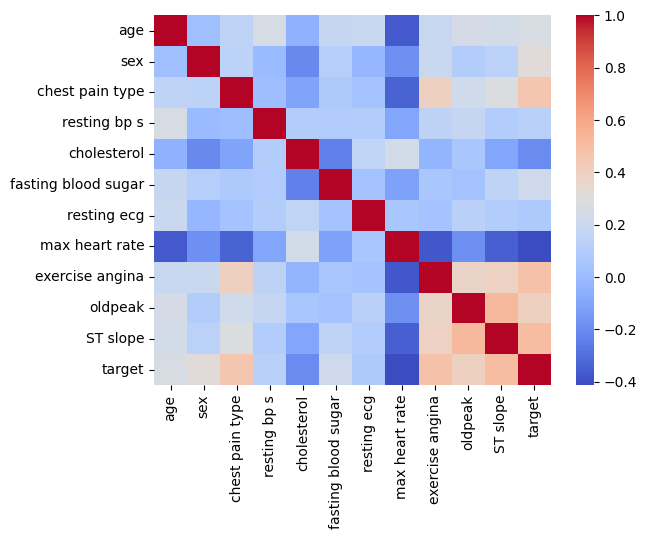

In [59]:
sns.heatmap(raw_data.corr(), cmap='coolwarm', fmt=".2f")
plt.savefig("heatmap")

**Plotting of linemap**

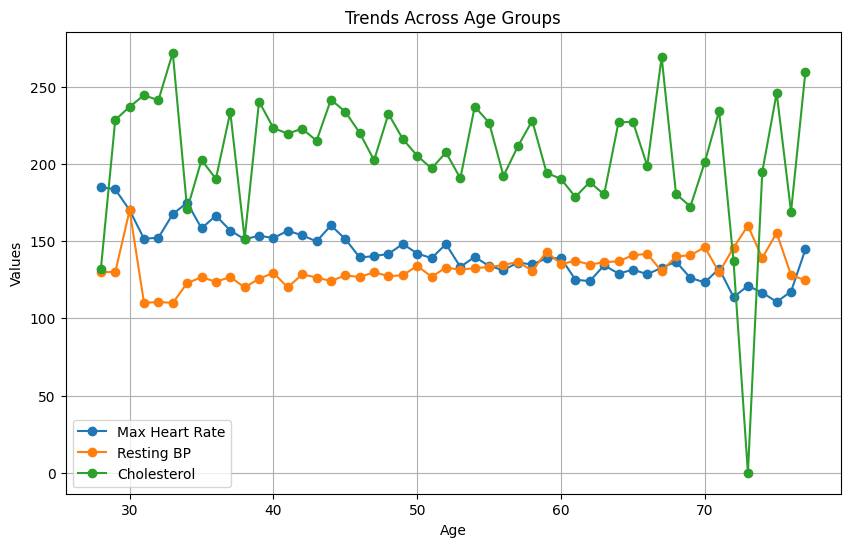

<Figure size 640x480 with 0 Axes>

In [60]:
# Calculate average values for each column by age
avg_values_by_age = raw_data.groupby('age').mean()

# Line graph
plt.figure(figsize=(10, 6))

# Plotting 'max heart rate'
plt.plot(avg_values_by_age.index, avg_values_by_age['max heart rate'], marker='o', linestyle='-', label='Max Heart Rate')

# Plotting 'resting bp s'
plt.plot(avg_values_by_age.index, avg_values_by_age['resting bp s'], marker='o', linestyle='-', label='Resting BP')

# Plotting 'cholesterol'
plt.plot(avg_values_by_age.index, avg_values_by_age['cholesterol'], marker='o', linestyle='-', label='Cholesterol')

plt.title('Trends Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("linemap")

**Clustering algorithm**

In [61]:
kmeans = KMeans(n_clusters=3, n_init=10)  # Explicitly set n_init to 10

In [62]:
kmeans.fit(raw_data)

KMeans(n_clusters=3, n_init=10)

In [64]:
identified_clusters = kmeans.fit_predict(raw_data)
identified_clusters

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [65]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,Cluster
0,40,1,2,140,289,0,0,172,0,0.0,1,0,2
1,49,0,3,160,180,0,0,156,0,1.0,2,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0,2
3,48,0,4,138,214,0,0,108,1,1.5,2,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1,2
1186,68,1,4,144,193,1,0,141,0,3.4,2,1,0
1187,57,1,4,130,131,0,0,115,1,1.2,2,1,0
1188,57,0,2,130,236,0,2,174,0,0.0,2,1,0


In [66]:
# Selecting relevant features for clustering
X = data_with_clusters[['age', 'cholesterol']]  # Adjust the features as needed

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly setting n_init
kmeans.fit(X)

# Assign cluster labels to the DataFrame
data_with_clusters['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(data_with_clusters.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  \
0            0             172                0      0.0         1       0   
1            0             156                0      1.0         2       1   
2            1              98                0      0.0         1       0   
3            0             108                1      1.5         2       1   
4            0             122                0      0.0         1       0   

   Cluster  
0        2  
1        0  
2        2 

 2 clusters silhouette score = 0.62
 3 clusters silhouette score = 0.41
 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.38
 6 clusters silhouette score = 0.40
 7 clusters silhouette score = 0.40
 8 clusters silhouette score = 0.38
 9 clusters silhouette score = 0.38
10 clusters silhouette score = 0.37
Best number of clusters =  2


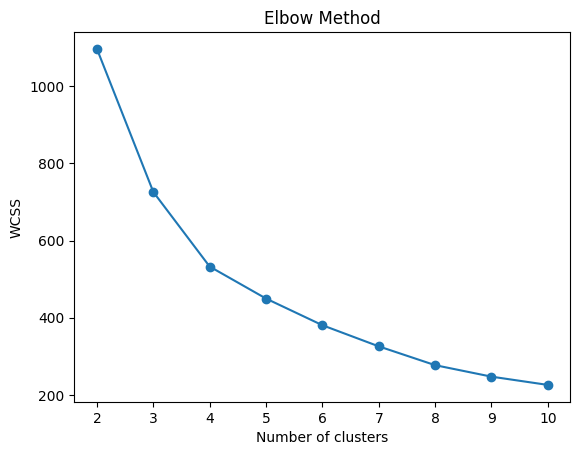

<Figure size 640x480 with 0 Axes>

In [67]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
def one_silhouette_inertia(n, xy):
    """
    Calculates the silhouette score and WCSS for n clusters
    """
    # Set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    # Calculate the silhouette score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_
    return score, inertia

def plot_fitted_features(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centers shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data')
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.show()

# Selecting relevant features for clustering
df_clust = raw_data[['age', 'cholesterol']].copy()

# Scaling the data
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

# Determining the silhouette score and inertia for different number of clusters
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhouette_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhouette score = {score:0.2f}")
print(f"Best number of clusters = {best_n:2g}")

# Plotting the elbow method
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
plt.savefig("Elbow method")

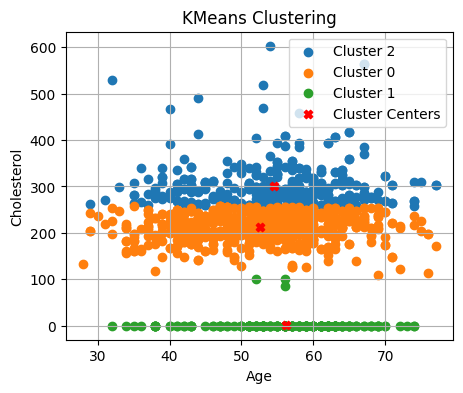

<Figure size 640x480 with 0 Axes>

In [68]:
# Extract cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(5, 4))

# Plot data points
for cluster_label in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_label]
    plt.scatter(cluster_data['age'], cluster_data['cholesterol'], label=f'Cluster {cluster_label}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='red', label='Cluster Centers')

plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("kmeans_clustering")

**Finding accuracy of the data**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your pandas DataFrame containing the dataset
# X contains the features and y contains the target labels
X = raw_data.drop(columns=['target'])
y = raw_data['target']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train your model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on train and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating accuracy on train and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculating recall on test set
test_recall = recall_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)


Train Accuracy: 0.8259303721488596
Test Accuracy: 0.8571428571428571
Test Recall: 0.8768472906403941


**plotting of fitting (linear regression)**

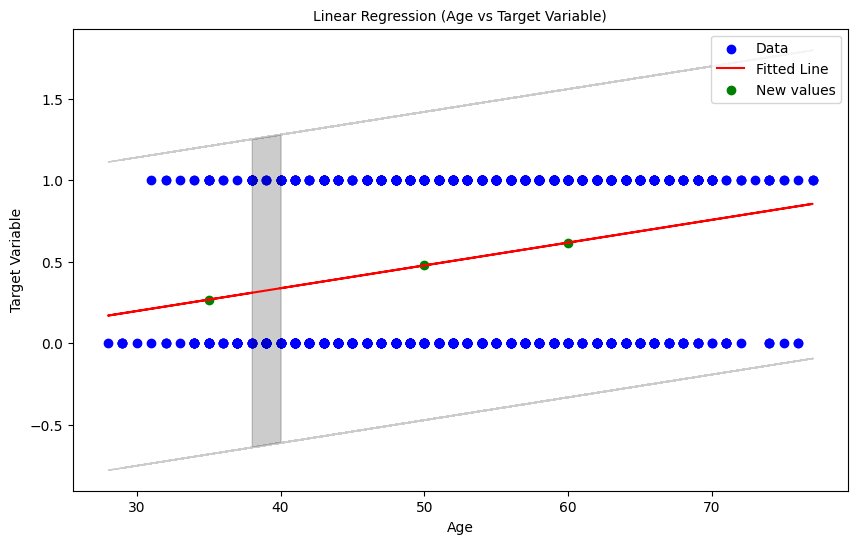

Slope: 0.01398295231875698
Intercept: -0.22259512006821647
Confidence Interval (95%): 0.9451590865728319
R^2: 0.0686590780594516
MAE: 0.46414990436302456
MSE: 0.2320749521815122
RMSE: 0.4817415823670531


<Figure size 640x480 with 0 Axes>

In [70]:
from sklearn.metrics import r2_score
from sklearn import metrics
def line_fitting(x, y, new_points=None):
    """
    Perform linear fitting, visualize the fitted line with confidence interval, and predict new data points.

    Parameters:
        x : Independent variable (x-axis).
        y : Dependent variable (y-axis).
        new_points : New points to be predicted (optional).

    Returns:
        tuple: Tuple containing slope, intercept, and confidence interval of the fitted line.
    """
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Generate predicted y-values based on the fitted line
    y_pred = model.predict(x)

    # Calculate residuals
    residuals = y - y_pred

    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)

    # Calculate t-value for a 95% confidence interval
    t_value = stats.t.ppf(0.975, df=len(x) - 2)

    # Calculate confidence interval for each point
    confidence_interval = t_value * std_residuals

    # Visualize Results
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    # Plot confidence interval
    plt.fill_between(x.flatten(), y_pred - confidence_interval, y_pred + confidence_interval, color='black', alpha=0.2)

    # Plot new points if provided
    if new_points:
        new_values_pred = model.predict(np.array(new_points).reshape(-1, 1))
        plt.scatter(np.array(new_points), new_values_pred, color='green', label='New values')

    plt.xlabel('Age', fontsize=10)
    plt.ylabel('Target Variable', fontsize=10)
    plt.title('Linear Regression (Age vs Target Variable)', fontsize=10)
    plt.legend()
    plt.show()
    plt.savefig("fitting")

    # Return slope, intercept, and confidence interval
    return model.coef_[0], model.intercept_, confidence_interval, model


# Independent variable (x-axis)
x = raw_data['age'].values.reshape(-1, 1)
# Dependent variable (y-axis)
y = raw_data['target'].values

# New points to predict
new_points = [[35], [50], [60]]

# Fitting the best fit line, plotting with confidence interval, and predicting new data points
slope, intercept, confidence_interval, model = line_fitting(x, y, new_points)

# Printing the slope, intercept, and confidence interval
print("Slope:", slope)
print("Intercept:", intercept)
print("Confidence Interval (95%):", confidence_interval)

# R-squared
y_pred = model.predict(x)
r_squared = metrics.r2_score(y, y_pred)
print("R^2:", r_squared)

# Adjusted R-squared (since we don't have a test set, we'll skip this)
# Adjusted_R_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
# print("Adjusted R^2:", Adjusted_R_squared)

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y, y_pred)
print("MAE:", mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y, y_pred)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

